<a href="https://colab.research.google.com/github/Hlompho-Dash/first_try_of_fastai/blob/master/01_matmul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

from google.colab import drive
drive.mount('/content/gdrive')

os.chdir('/content/gdrive/MyDrive/first_try_of_fastai')

print("------------------------------------------------------------------")

Mounted at /content/gdrive
------------------------------------------------------------------


In [2]:
print(os.getcwd())

/content/gdrive/MyDrive/first_try_of_fastai


In [3]:
#export
from exp.nb_00 import *
import operator

def test(a,b,cmp, cname=None):
  if cname is None: cname = cmp.__name__
  assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,"==")


In [4]:
test_eq(TEST,"test")

In [5]:
 #export

from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL = "http://deeplearning.net/data/mnist/mnist.pkl"

In [6]:
#path = datasets.download_data(MNIST_URL)
#path

path1 = "/content/gdrive/MyDrive/first_try_of_fastai/mnist.pkl.gz"
path2 = "/content/gdrive/MyDrive/first_try_of_fastai/mnist (1).pkl.gz"

In [7]:
with gzip.open(path2, "rb") as f:
  ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding = "latin-1")

In [8]:
??tensor

In [9]:
x_train,y_train,x_valid,y_vlaid = map(tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape,y_train, y_train.shape, y_train.min(),y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [10]:
assert n==y_train.shape[0]==50000

test_eq(c,28*28)
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

In [11]:
mpl.rcParams["image.cmap"] = "gray"

In [12]:
img = x_train[0]

In [13]:
img.view(28,28).type()

'torch.FloatTensor'

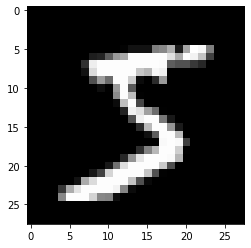

In [14]:
plt.imshow(img.view(28,28))

**Initial Python model**

y = Ax + B MODEL

In [15]:
weights = torch.randn(784,10)

In [16]:
bias = torch.zeros(10)

In [17]:
def matmul(a,b):
  ar,ac = a.shape
  br,bc = b.shape

  assert ac==br
  c = torch.zeros(ar, bc)
  for i in range(ar):
    for j in range(bc):
      for k in range(ac):
        c[i,j] += a[i,k] * b[k,j]
  return c

In [18]:
m1 = x_valid[:5]
m2 = weights

In [19]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [20]:
%time t1=matmul(m1,m2)

CPU times: user 848 ms, sys: 0 ns, total: 848 ms
Wall time: 861 ms


In [21]:
t1.shape

torch.Size([5, 10])

In [22]:
a = tensor([10,6,-4])
b = tensor([2,8,7])

a,b

(tensor([10,  6, -4]), tensor([2, 8, 7]))

In [23]:
a + b

tensor([12, 14,  3])

In [24]:
(a < b).float().mean()

tensor(0.6667)

In [25]:
m = tensor([[1.,2,3],[4,5,6],[7,8,9]])
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Check out https://course19.fast.ai/videos/?lesson=8 at 48:09 to see how to write latex in jupyter notebooks. 

Go to the wiki page of the equation an copy and paste the equation in latex into jupyter notebook 

like below:

$$\|A\|_{F}={\sqrt {\operatorname {spur} \left(A^{H}A\right)}}={\sqrt {\operatorname {spur} \left(AA^{H}\right)}}=\|A^{H}\|_{F}$$

$$\|A\|_{\text{F}}={\sqrt {\sum _{i=1}^{m}\sum _{j=1}^{n}|a_{ij}|^{2}}}={\sqrt {\operatorname {trace} \left(A^{*}A\right)}}={\sqrt {\sum _{i=1}^{\min\{m,n\}}\sigma _{i}^{2}(A)}},$$


or on archix you can click download source and it will give you the original TEX file for the paper then your can just copy the equation

In [26]:
(m*m).sum().sqrt()

tensor(16.8819)

**ELEMENT WISE MULTIPLICATION AND SUMMATION**

In [27]:
def matmul(a,b):
  ar,ac = a.shape
  br,bc = b.shape

  assert ac==br
  c = torch.zeros(ar, bc)
  for i in range(ar):
    for j in range(bc):
        c[i,j] = (a[i,:] * b[:,j]).sum()
  return c

In [28]:
%timeit -n 1 _=matmul(m1,m2)

1 loop, best of 3: 1.82 ms per loop


In [32]:
%time _= matmul(m1,m2)

CPU times: user 2.38 ms, sys: 62 µs, total: 2.44 ms
Wall time: 3.41 ms


In [30]:
890.1/5

178.02

In [35]:
#export

def near(a, b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a, b): test(a, b, near)

In [37]:
test_near(t1, matmul(m1, m2))

**BROADCASTING**

In [55]:
c = tensor([10,20,30])
c,c.shape

(tensor([10, 20, 30]), torch.Size([3]))

In [42]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [43]:
m.shape,c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [45]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [47]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [48]:
t = c.expand_as(m)

In [49]:
t

tensor([[10, 20, 30],
        [10, 20, 30],
        [10, 20, 30]])

In [50]:
t.storage()

 10
 20
 30
[torch.LongStorage of size 3]

In [51]:
t.stride(),t.shape

((0, 1), torch.Size([3, 3]))

In [52]:
c.unsqueeze(0)

tensor([[10, 20, 30]])

In [53]:
c.unsqueeze(1)

tensor([[10],
        [20],
        [30]])

In [54]:
c.shape,c.unsqueeze(0).shape,c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [56]:
c.shape,c[None,:].shape,c[:,None].shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [57]:
c[:,None].expand_as(m)

tensor([[10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]])

In [59]:
m + c[None,]

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

**Matmul with broadcasting**

In [60]:
def matmul(a, b):
  ar,ac = a.shape
  br,bc = b.shape
  assert ac == br
  c = torch.zeros(ar,bc) 
  for i in range(ar):
    c[i] = (a[i].unsqueeze(-1) * b).sum(dim=0) #dim refers to which axis and * mean elementwise @ mean matmul
  return c

In [61]:
timeit -n 10 _=matmul(m1,m2)

10 loops, best of 3: 316 µs per loop


In [62]:
885000/277

3194.945848375451

In [63]:
test_near(t1, matmul(m1,m2))

**EINSTEIN SUMMATION**

In [66]:
def matmul(a,b): return torch.einsum("ik,kj->ij", a,b)

In [67]:
%timeit -n 10 _ = matmul(m1,m2)

The slowest run took 100.53 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 35.6 µs per loop


In [68]:
885000/55

16090.90909090909

In [69]:
test_near(t1, matmul(m1,m2))

**PYTORCH INTERNAL COMMANDS FOR MATRIX MULTIPLY**

In [70]:
%timeit -n 10 _= m1.matmul(m2)

The slowest run took 8.46 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 14.9 µs per loop


In [71]:
t2 = m1@m2

In [72]:
test_near(t1,t2)

In [74]:
!pip install fire

     |████████████████████████████████| 81kB 3.5MB/s 
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111007 sha256=7a99aa91b4a38f6e3773b92cab5de818d397a1b347e53f54027964020a6a9c8f
  Stored in directory: /root/.cache/pip/wheels/c1/61/df/768b03527bf006b546dce284eb4249b185669e65afc5fbb2ac
Successfully built fire


In [76]:
!python notebook2script.py 01_matmul.ipynb

Converted 01_matmul.ipynb to exp/nb_01.py
